In [1]:
#MULTIPLE LINEAR REGRESSION

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df=pd.read_csv("Economic_index.csv")

In [4]:
df

,year,month,interest_rate,unemployment_rate,index_price
0,2020,1,3.0,5.0,1200
1,2020,2,2.9,5.1,1185
2,2020,3,2.8,5.3,1170
3,2020,4,2.7,5.4,1155
4,2020,5,2.6,5.5,1140
5,2020,6,2.5,5.6,1125
6,2020,7,2.4,5.7,1110
7,2020,8,2.3,5.8,1095
8,2020,9,2.2,5.9,1080
9,2020,10,2.1,6.0,1065


In [5]:
#EDA ANALYSIS
df.head(5)

,year,month,interest_rate,unemployment_rate,index_price
0,2020,1,3.0,5.0,1200
1,2020,2,2.9,5.1,1185
2,2020,3,2.8,5.3,1170
3,2020,4,2.7,5.4,1155
4,2020,5,2.6,5.5,1140


In [6]:
#Rename columns for better readability
df.columns=["Year","Month","Interest_Rate","Unemployment_Rate","Index_Price"]

In [7]:
df.columns

Index(['Year', 'Month', 'Interest_Rate', 'Unemployment_Rate', 'Index_Price'], dtype='object')

In [8]:
#EXPLORATORY DATA ANALYSIS

In [9]:
df.isnull()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [10]:
df.isnull().sum()

Year                 0
Month                0
Interest_Rate        0
Unemployment_Rate    0
Index_Price          0
dtype: int64

In [11]:
df.describe

<bound method NDFrame.describe of     Year  Month  Interest_Rate  Unemployment_Rate  Index_Price
0   2020      1            3.0                5.0         1200
1   2020      2            2.9                5.1         1185
2   2020      3            2.8                5.3         1170
3   2020      4            2.7                5.4         1155
4   2020      5            2.6                5.5         1140
5   2020      6            2.5                5.6         1125
6   2020      7            2.4                5.7         1110
7   2020      8            2.3                5.8         1095
8   2020      9            2.2                5.9         1080
9   2020     10            2.1                6.0         1065
10  2020     11            2.0                6.1         1050
11  2020     12            1.9                6.2         1035
12  2021      1            1.8                6.3         1020
13  2021      2            1.9                6.1         1035
14  2021      3      

In [12]:
df.info

<bound method DataFrame.info of     Year  Month  Interest_Rate  Unemployment_Rate  Index_Price
0   2020      1            3.0                5.0         1200
1   2020      2            2.9                5.1         1185
2   2020      3            2.8                5.3         1170
3   2020      4            2.7                5.4         1155
4   2020      5            2.6                5.5         1140
5   2020      6            2.5                5.6         1125
6   2020      7            2.4                5.7         1110
7   2020      8            2.3                5.8         1095
8   2020      9            2.2                5.9         1080
9   2020     10            2.1                6.0         1065
10  2020     11            2.0                6.1         1050
11  2020     12            1.9                6.2         1035
12  2021      1            1.8                6.3         1020
13  2021      2            1.9                6.1         1035
14  2021      3        

In [13]:
df.shape

(36, 5)

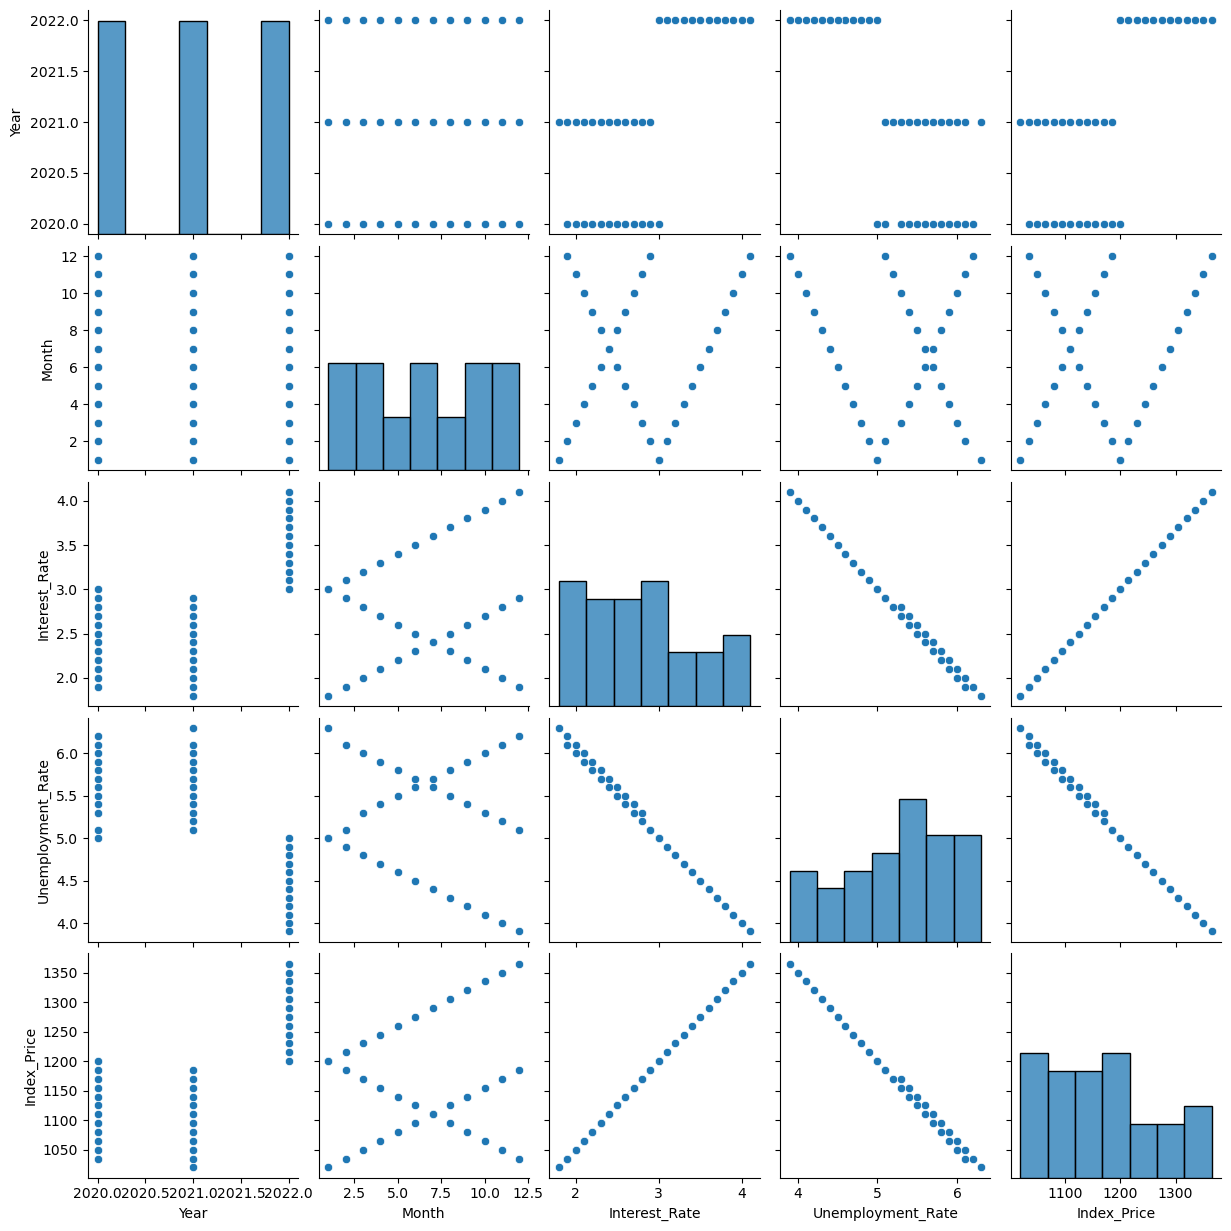

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
df.corr()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
Year,1.000000e+00,3.250932e-14,0.697330,-0.723067,0.697330
Month,3.250932e-14,1.000000e+00,0.178681,-0.166808,0.178681
Interest_Rate,6.973301e-01,1.786806e-01,1.000000,-0.998211,1.000000
Unemployment_Rate,-7.230670e-01,-1.668080e-01,-0.998211,1.000000,-0.998211
Index_Price,6.973301e-01,1.786806e-01,1.000000,-0.998211,1.000000


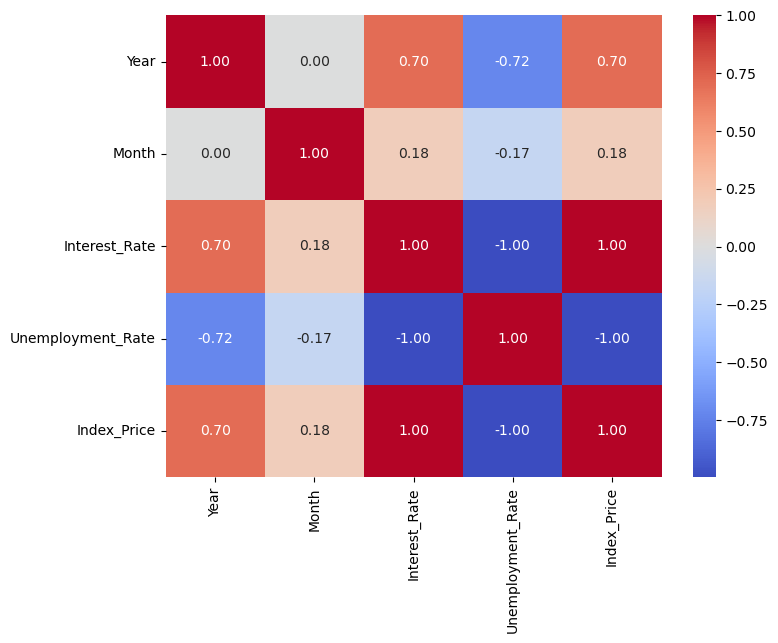

In [16]:
#CORRELATION HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [17]:
#feature selection & target variable
X=df[["Interest_Rate","Unemployment_Rate"]]
Y=df[["Index_Price"]]

In [19]:
#THE STANDARD SCALER IS USED FOR FEATURE SCALING IN MACHINE LEARNING
#WHY USE STANDARDSCALER()?
#ENSURES ALL FEATURES HAVE A MEAN OF 0 AND A STANDARD DEVIATION OF 1.
#PREVENTS FEATURES WITH LARGE VALUES FROM DOMINATING THE MODEL.
#IMPROVES THE PERFORMAMCE OF MODELS THAT ARE SENSITIVE TO FEATURE SCALING, SUCH AS:
#LINEAR REGRESSION
#LOGISTIC RERESSION
#SUPPORT VECTOR MACHINES(SVM)
#K-NEAREST NEIGHBOURS(KNN)
#PRINCIPAL COMPONENT ANALYSIS(PCA)

#FIT_TRANSFORM(X):
#FIT(X):CALCULATES THE MEAN AND STANDARD DEVIATION OF X.
#TRANSFORM(X):APPLIES THE TRANSFORMATION TO SCALE THE DATA.

In [21]:
#Standardization
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)  #tranform prevent the data from leakage
#fit_transform means values are calculated and applied to the model
#fit means only values are calculated not applied to the model

In [ ]:
#FIT() DEFINITION--->
#IT CALCULATES AND STORES THE PARAMETERS NEEDED FOR TRANSFORMATION BUT DOES NOT APPLY THE TRANSFORMATION.
#EXAMPLE:-IN STANDARDSCALER,IT CXALCULATES THE MEAN AND STANDARD DEVIATION OF EACH FEATURE.
#USE CASE:


In [25]:
#Train-Test split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42)

In [27]:
#linear regression model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [29]:
#predictions
Y_pred=model.predict(X_test)

In [31]:
#model evaluation
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,Y_pred)

In [33]:
mae

0.0

In [35]:
mse

0.0

In [37]:
rmse

0.0

In [39]:
r2

1.0

In [41]:
#cross validation
cv_scores=cross_val_score(model,X_train,Y_train,cv=3,scoring="r2")

In [43]:
cv_scores

array([1., 1., 1.])

In [45]:
np.mean(cv_scores)

1.0

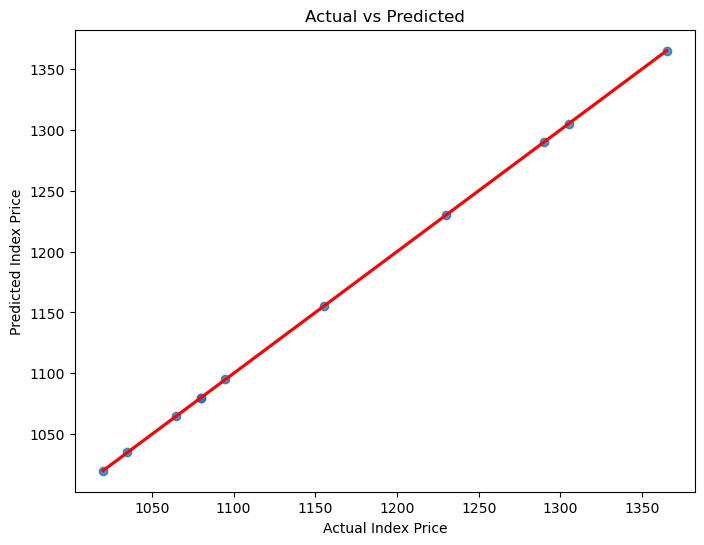

In [51]:
#visualizing regression line
plt.figure(figsize=(8,6))
sns.regplot(x=Y_test,y=Y_pred,line_kws={"color":"red"})
plt.xlabel("Actual Index Price")
plt.ylabel("Predicted Index Price")
plt.title("Actual vs Predicted")
plt.show()